In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
auto = pd.read_csv("Data/auto.txt", sep=";")
x_test= pd.read_csv("Data/x_test.csv", index_col=0)
x_train= pd.read_csv("Data/x_train.csv", index_col=0)
y_test= pd.read_csv("Data/y_test.csv", index_col=0)
y_train= pd.read_csv("Data/y_train.csv", index_col=0)
y_test_reg= pd.read_csv("Data/y_test_reg.csv", index_col=0)
y_train_reg= pd.read_csv("Data/y_train_reg.csv", index_col=0)

In [3]:
auto.mpg.describe()

count    300.000000
mean      23.699333
std        7.963814
min        9.000000
25%       17.000000
50%       23.600000
75%       29.925000
max       46.600000
Name: mpg, dtype: float64

comment on the différents outputs

In [4]:
print("x_test number of observations : ", len(y_test))
print("y_train number of observations : ", len(y_train))
print("y_test number of observations : ", len(y_test))
print("y_train number of observations : ", len(y_train))
print("y_test_reg number of observations : ", len(y_test_reg))
print("y_train_reg number of observations : ", len(y_train_reg))

x_test number of observations :  60
y_train number of observations :  240
y_test number of observations :  60
y_train number of observations :  240
y_test_reg number of observations :  60
y_train_reg number of observations :  240


2.1

In [5]:
regr_tree_auto = tree.DecisionTreeRegressor(max_depth=2)
regr_tree_auto.fit(x_train, y_train_reg)

DecisionTreeRegressor(max_depth=2)

[Text(0.5, 0.8333333333333334, 'displacement <= 159.5\nsquared_error = 61.444\nsamples = 240\nvalue = 23.853'),
 Text(0.25, 0.5, 'horsepower <= 79.0\nsquared_error = 31.639\nsamples = 136\nvalue = 29.204'),
 Text(0.125, 0.16666666666666666, 'squared_error = 25.76\nsamples = 73\nvalue = 32.118'),
 Text(0.375, 0.16666666666666666, 'squared_error = 17.221\nsamples = 63\nvalue = 25.829'),
 Text(0.75, 0.5, 'horsepower <= 127.0\nsquared_error = 13.995\nsamples = 104\nvalue = 16.855'),
 Text(0.625, 0.16666666666666666, 'squared_error = 9.106\nsamples = 46\nvalue = 19.865'),
 Text(0.875, 0.16666666666666666, 'squared_error = 4.985\nsamples = 58\nvalue = 14.467')]

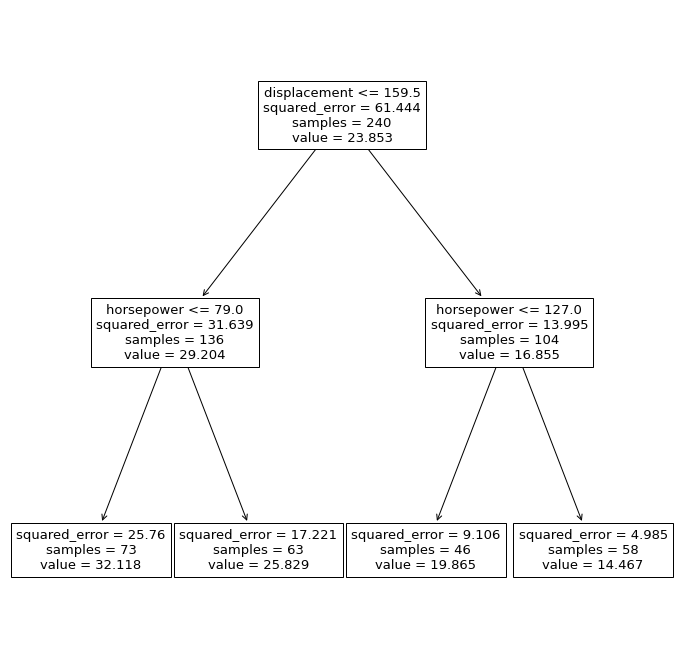

In [6]:
plt.figure(figsize=(12,12))
tree.plot_tree(regr_tree_auto, feature_names=x_train.columns)

1.a : the topmost node is a sample of 240 observations with a value between 23.853 and 149.879 with a std of 3798.471.

b. 4 terminal nodes
c. 

### 2.2 Classification Trees

In [7]:
class_tree_auto = tree.DecisionTreeClassifier(max_depth=3)
class_tree_auto.fit(x_train, y_train["mpg01"])

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'displacement <= 190.5\ngini = 0.499\nsamples = 240\nvalue = [116, 124]'),
 Text(0.25, 0.625, 'horsepower <= 101.0\ngini = 0.252\nsamples = 142\nvalue = [21, 121]'),
 Text(0.125, 0.375, 'horsepower <= 81.5\ngini = 0.171\nsamples = 127\nvalue = [12, 115]'),
 Text(0.0625, 0.125, 'gini = 0.05\nsamples = 78\nvalue = [2, 76]'),
 Text(0.1875, 0.125, 'gini = 0.325\nsamples = 49\nvalue = [10, 39]'),
 Text(0.375, 0.375, 'weight <= 2931.5\ngini = 0.48\nsamples = 15\nvalue = [9, 6]'),
 Text(0.3125, 0.125, 'gini = 0.496\nsamples = 11\nvalue = [5, 6]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.625, 'horsepower <= 92.5\ngini = 0.059\nsamples = 98\nvalue = [95, 3]'),
 Text(0.625, 0.375, 'displacement <= 255.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(0.5625, 0.125, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.875, 0.375, 'horsepower <= 107.5\ngini = 0.023\nsam

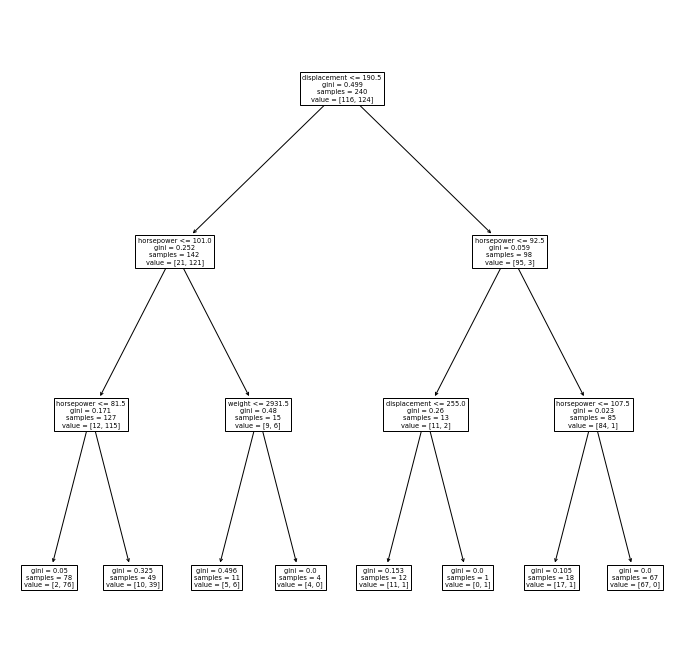

In [8]:
plt.figure(figsize=(12,12))
tree.plot_tree(class_tree_auto, feature_names=x_train.columns)

In [9]:
x_train

,cylinders,displacement,horsepower,weight
134,4,115.0,95,2694
145,6,250.0,105,3353
63,4,97.0,92,2288
293,4,91.0,67,1965
285,4,151.0,90,2735
...,...,...,...,...
251,4,91.0,67,1850
192,8,260.0,110,3365
117,6,250.0,72,3432
47,8,400.0,175,4385


In [10]:
prun_tree_auto = tree.DecisionTreeClassifier(random_state=1)
path = prun_tree_auto.cost_complexity_pruning_path(x_train, y_train)
alphas, impurities = path.ccp_alphas, path.impurities

In [11]:
class_tree_auto_list = []
for alpha in alphas: 
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=alpha)
    clf.fit(x_train, y_train["mpg01"])
    class_tree_auto_list.append(clf)


In [12]:
class_tree_auto_list = class_tree_auto_list[:-1]
alphas = alphas[:-1]

In [13]:
error_clf_test = 1 - clf.score(x_test, y_test)
print('Erreur test set: %f' % error_clf_test)

Erreur test set: 0.566667


In [14]:
error_clf_train = 1 - clf.score(x_train, y_train)
print('Erreur test set: %f' % error_clf_train)

Erreur test set: 0.483333


### 2.4 Support Vector machines (SVM)

In [15]:
svm_auto = SVC(C=1, kernel='linear')
svm_auto.fit(x_train, np.ravel(y_train))

SVC(C=1, kernel='linear')

In [16]:
error_svm = 1 - svm_auto.score(x_test, y_test)
print('Erreur test set: %f' % error_svm)

Erreur test set: 0.133333


In [17]:
list = svm_auto.support_

In [18]:
print("The number of support vectors is this model : ", np.count_nonzero(list))

The number of support vectors is this model :  54


In [19]:
#tuned_parameters = [{'C': [0.001, 0.01, 0.1, 1, 5, 10]}]
#svm_auto_CV = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
#svm_auto_CV.fit(x_train, np.ravel(y_train))
#svm_auto_CV.best_params_
#Output : {'C': 0.001}

the best value of C in terms of accuracy accordind to the output C = 0,001 

In [20]:
tuned_parameters = [{'C': [0.001]}]
svm_auto_CV = GridSearchCV(SVC(kernel='linear'), tuned_parameters, cv=10, scoring='accuracy')
svm_auto_CV.fit(x_train, np.ravel(y_train))

GridSearchCV(cv=10, estimator=SVC(kernel='linear'), param_grid=[{'C': [0.001]}],
             scoring='accuracy')

In [21]:
svm_auto_CV.best_estimator_.n_support_

array([31, 31], dtype=int32)

In [22]:
error_svm_auto_CV = 1 - svm_auto_CV.score(x_train, y_train)
print('Erreur train set: %f' % error_svm_auto_CV)

Erreur train set: 0.100000


In [23]:
y_pred = svm_auto_CV.best_estimator_.predict(x_train)

In [24]:
confusion_matrix(y_pred, y_train)

array([[ 99,   7],
       [ 17, 117]])

In [25]:
accuracy_score(y_pred, y_train)

0.9

In [26]:
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       106
           1       0.94      0.87      0.91       134

    accuracy                           0.90       240
   macro avg       0.90      0.90      0.90       240
weighted avg       0.90      0.90      0.90       240



In [27]:
np.random.seed(8)
X = np.random.randn(200, 2)
X[:100] = X[:100] + 2
X[101:150] = X[101:150] -2 
Y = np.concatenate([np.repeat(-1, 150), np.repeat(1, 50)])

Text(0, 0.5, 'X2')

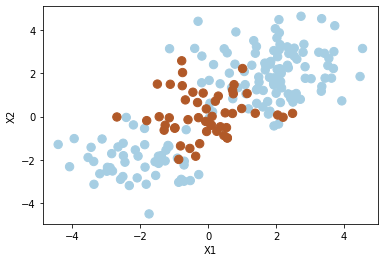

In [28]:
plt.scatter(X[:, 0], X[:, 1], s=70, c=Y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [29]:
svm_radical = SVC(C=1.0, kernel='rbf', gamma=1)
svm_radical.fit(X, Y)

SVC(gamma=1)

Text(0, 0.5, 'X2')

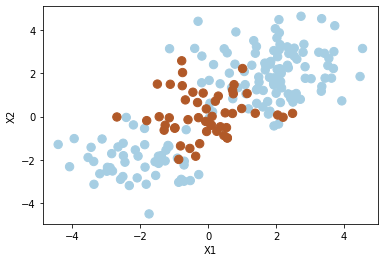

In [30]:
plt.scatter(X[:, 0], X[:, 1], s=70, c=Y, cmap=plt.cm.Paired)
plt.xlabel('X1')
plt.ylabel('X2')

In [31]:
h = 0.02
pad = 0.25

x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

In [32]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

In [33]:
Z = svm_radical.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

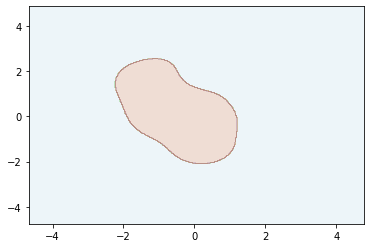

In [34]:
plt.contourf(xx, yy, Z, cmap = plt.cm.Paired, alpha=0.2)

In [35]:
tuned_parameters = [{'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.5, 1, 2, 3, 4]}]
svm_radical_auto_CV = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
svm_radical_auto_CV.fit(x_train, np.ravel(y_train))

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [0.01, 0.1, 1, 10, 100],
                          'gamma': [0.5, 1, 2, 3, 4]}],
             scoring='accuracy')

In [36]:
svm_radical_auto_CV.best_params_

{'C': 1, 'gamma': 0.5}

In [37]:
tuned_parameters = [{'C': [1], 'gamma': [0.5]}]
svm_radical_auto_CV = GridSearchCV(SVC(kernel='rbf'), tuned_parameters, cv=10, scoring='accuracy')
svm_radical_auto_CV.fit(x_train, np.ravel(y_train))

GridSearchCV(cv=10, estimator=SVC(), param_grid=[{'C': [1], 'gamma': [0.5]}],
             scoring='accuracy')

In [38]:
svm_radical_auto_CV.best_score_

0.525

In [39]:
y_pred = svm_radical_auto_CV.best_estimator_.predict(x_train)

In [40]:
confusion_matrix(y_pred, y_train)

array([[116,   0],
       [  0, 124]])

In [41]:
accuracy_score(y_pred, y_train)

1.0

In [42]:
print(classification_report(y_pred, y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       116
           1       1.00      1.00      1.00       124

    accuracy                           1.00       240
   macro avg       1.00      1.00      1.00       240
weighted avg       1.00      1.00      1.00       240



In [43]:
tuned_parameters = [{'C': [0.1, 1, 10], 'degree': [3, 4, 5]}]
svm_poly_auto_CV = GridSearchCV(SVC(kernel='poly', C=[0.1, 1, 10], degree=[3, 4, 5]))
svm_poly_auto_CV.fit(x_train, np.ravel(y_train))

TypeError: GridSearchCV.__init__() missing 1 required positional argument: 'param_grid'

In [ ]:
svm_radical_auto_CV.fit(x_train, np.ravel(y_train))


In [ ]:
from sympy import degree


svm_poly_auto_CV = GridSearchCV(SVC(kernel='ploy'), C=1, degree=3, 
)